In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import glob
import scipy.stats as stats

In [7]:
confidence_values = []

folder_path = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/TrainingVacasVaqueras/MODELOfinal/TESTEO2/labels'

file_paths = glob.glob(folder_path + '*.txt')

for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.split()
            confidence = float(parts[-1])
            confidence_values.append(confidence)

In [8]:
import os
import numpy as np
from scipy import stats

folder_path = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/TrainingVacasVaqueras/MODELOfinal/TESTEO2/labels'

confidence_values = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        with open(os.path.join(folder_path, filename), 'r') as file:
            lines = file.readlines()
            for line in lines:
                values = line.strip().split()
                if values:  # asegurarse de que la línea no esté vacía
                    confidence = float(values[-1])  # último valor es la confianza
                    confidence_values.append(confidence)

if len(confidence_values) > 0:
    confidences_array = np.array(confidence_values)

    mean_confidence = np.mean(confidences_array)
    std_error_mean = np.std(confidences_array, ddof=1) / np.sqrt(len(confidences_array))
    sample_size = len(confidences_array)

    confidence_level = 0.95
    z_critical = stats.norm.ppf((1 - confidence_level) / 2)

    lower_bound = mean_confidence - (z_critical * std_error_mean)
    upper_bound = mean_confidence + (z_critical * std_error_mean)

    print(f"Media de confianza: {mean_confidence:.4f}")
    print(f"Desviación estándar de la media: {std_error_mean:.4f}")
    print(f"Tamaño de la muestra (n): {sample_size}")
    print(f"Valor crítico Z para el nivel de confianza del {confidence_level*100}%: {z_critical:.4f}")
    print(f"Intervalo de Confianza al {confidence_level*100}% para la media de confianza: ({lower_bound:.4f}, {upper_bound:.4f})")
else:
    print("No hay valores numéricos válidos en la lista de confianzas.")

Media de confianza: 0.5068
Desviación estándar de la media: 0.0013
Tamaño de la muestra (n): 9966
Valor crítico Z para el nivel de confianza del 95.0%: -1.9600
Intervalo de Confianza al 95.0% para la media de confianza: (0.5094, 0.5042)


In [9]:
import pandas as pd
from datetime import datetime
import glob

excel_file_path = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/TrainingAzu/LayoutTagsDetallado.xlsx'

df_layout = pd.read_excel(excel_file_path)

print(df_layout.head())

   layout_id      field_name    location country  latitude  longitude  \
0       3140  Pontão FX1 FX2   Pontão RS  Brasil   -28.057    -52.679   
1       3142  Pontão FX1 FX2   Pontão RS  Brasil   -28.057    -52.679   
2       3143          Tibagi      Tibagi  Brasil   -24.508    -50.417   
3       3144          Tibagi      Tibagi  Brasil   -24.508    -50.417   
4       3147      Palma Sola  Palma Sola  Brasil   -26.347    -53.297   

          flight_date  
0 2018-10-25 09:00:00  
1 2018-10-25 09:00:00  
2 2018-10-27 16:15:00  
3 2018-10-27 16:15:00  
4 2018-10-29 12:00:00  


In [10]:
import pandas as pd
import numpy as np

def get_season(country, date_str):
    # Convertir la cadena de fecha a datetime
    date = pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')

    if country == 'USA':
        if 3 <= date.month <= 5:
            return 'Primavera'
        elif 6 <= date.month <= 8:
            return 'Verano'
        elif 9 <= date.month <= 11:
            return 'Otoño'
        else:
            return 'Invierno'
    elif country == 'Argentina' or country == 'Brasil':
        if 3 <= date.month <= 5:
            return 'Otoño'  # Otoño
        elif 6 <= date.month <= 8:
            return 'Invierno'  # Invierno
        elif 9 <= date.month <= 11:
            return 'Primavera'  # Primavera
        else:
            return 'Verano'  # Verano
    else:
        return 'Unknown'

excel_file_path = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/TrainingAzu/LayoutTagsDetallado.xlsx'

df_layout = pd.read_excel(excel_file_path)

df_layout['season'] = df_layout.apply(lambda row: get_season(row['country'], row['flight_date']), axis=1)

print(df_layout.head())

   layout_id      field_name    location country  latitude  longitude  \
0       3140  Pontão FX1 FX2   Pontão RS  Brasil   -28.057    -52.679   
1       3142  Pontão FX1 FX2   Pontão RS  Brasil   -28.057    -52.679   
2       3143          Tibagi      Tibagi  Brasil   -24.508    -50.417   
3       3144          Tibagi      Tibagi  Brasil   -24.508    -50.417   
4       3147      Palma Sola  Palma Sola  Brasil   -26.347    -53.297   

          flight_date     season  
0 2018-10-25 09:00:00  Primavera  
1 2018-10-25 09:00:00  Primavera  
2 2018-10-27 16:15:00  Primavera  
3 2018-10-27 16:15:00  Primavera  
4 2018-10-29 12:00:00  Primavera  


In [11]:
import os

folder_path = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/TrainingVacasVaqueras/MODELOfinal/TESTEO2/labels'

confidences = []
layout_ids = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        layout_id = int(filename.split('_')[0])  # Obtener layout_id del nombre del archivo

        with open(os.path.join(folder_path, filename), 'r') as file:
            lines = file.readlines()
            for line in lines:
                parts = line.split()
                confidence = float(parts[-1])  # Obtener la confianza (última columna)
                confidences.append(confidence)
                layout_ids.append(layout_id)

df_confidences = pd.DataFrame({'layout_id': layout_ids, 'confidence': confidences})

print(df_confidences.head())

   layout_id  confidence
0      31255    0.304125
1      31255    0.360821
2      31255    0.472195
3      31255    0.472837
4      31255    0.487631


In [12]:
df_combined = pd.merge(df_confidences, df_layout, on='layout_id', how='left')
print(df_combined.head())

   layout_id  confidence field_name location    country  latitude  longitude  \
0      31255    0.304125     Cañete     ARBA  Argentina   -34.482    -58.245   
1      31255    0.360821     Cañete     ARBA  Argentina   -34.482    -58.245   
2      31255    0.472195     Cañete     ARBA  Argentina   -34.482    -58.245   
3      31255    0.472837     Cañete     ARBA  Argentina   -34.482    -58.245   
4      31255    0.487631     Cañete     ARBA  Argentina   -34.482    -58.245   

          flight_date  season  
0 2021-02-04 14:12:17  Verano  
1 2021-02-04 14:12:17  Verano  
2 2021-02-04 14:12:17  Verano  
3 2021-02-04 14:12:17  Verano  
4 2021-02-04 14:12:17  Verano  


In [13]:
print(df_combined['confidence'].min())

0.250089


In [14]:
from scipy.stats import levene, bartlett

confianza = df_combined['confidence']
estaciones = df_combined['season']

levene_test = levene(confianza[estaciones == 'Spring'],
                     confianza[estaciones == 'Summer'],
                     confianza[estaciones == 'Autumn'])

print("Prueba de Levene para homogeneidad de varianzas:")
print("Estadístico de prueba:", levene_test.statistic)
print("Valor p:", levene_test.pvalue)

bartlett_test = bartlett(confianza[estaciones == 'Spring'],
                         confianza[estaciones == 'Summer'],
                         confianza[estaciones == 'Autumn'])

print("\nPrueba de Bartlett para homogeneidad de varianzas:")
print("Estadístico de prueba:", bartlett_test.statistic)
print("Valor p:", bartlett_test.pvalue)

Prueba de Levene para homogeneidad de varianzas:
Estadístico de prueba: nan
Valor p: nan

Prueba de Bartlett para homogeneidad de varianzas:
Estadístico de prueba: nan
Valor p: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [15]:
df_combined['country_season'] = df_combined['country'] + '_' + df_combined['season']

print(df_combined.head())

   layout_id  confidence field_name location    country  latitude  longitude  \
0      31255    0.304125     Cañete     ARBA  Argentina   -34.482    -58.245   
1      31255    0.360821     Cañete     ARBA  Argentina   -34.482    -58.245   
2      31255    0.472195     Cañete     ARBA  Argentina   -34.482    -58.245   
3      31255    0.472837     Cañete     ARBA  Argentina   -34.482    -58.245   
4      31255    0.487631     Cañete     ARBA  Argentina   -34.482    -58.245   

          flight_date  season    country_season  
0 2021-02-04 14:12:17  Verano  Argentina_Verano  
1 2021-02-04 14:12:17  Verano  Argentina_Verano  
2 2021-02-04 14:12:17  Verano  Argentina_Verano  
3 2021-02-04 14:12:17  Verano  Argentina_Verano  
4 2021-02-04 14:12:17  Verano  Argentina_Verano  


In [16]:
import pandas as pd

average_confidence = df_combined.groupby(['location', 'country'])['confidence'].mean().reset_index()

average_confidence_sorted = average_confidence.sort_values(by='confidence', ascending=False)

print(average_confidence_sorted)

                  location    country  confidence
29                Rolândia     Brasil    0.747026
27               Pontão RS     Brasil    0.737983
31  Santa Terezinha Itaipu     Brasil    0.735129
36    State of Mato Grosso     Brasil    0.711057
24                Palotina     Brasil    0.693935
38                  Toledo     Brasil    0.693679
34             Sidrolândia     Brasil    0.687497
15                 Ivatuba     Brasil    0.682306
30           Santa Mariana     Brasil    0.681635
22              Medianeira     Brasil    0.681250
9                 Floresta     Brasil    0.674301
21           Manuel Ocampo  Argentina    0.663138
32           Santo Augusto     Brasil    0.657958
33            Sertanópolis     Brasil    0.653208
5                Castro pr     Brasil    0.649598
2             Aral Moreira     Brasil    0.645996
14                Ipiranga     Brasil    0.640189
7         Corral de Bustos  Argentina    0.617083
3             Campo Mourão     Brasil    0.610727


In [17]:
import pandas as pd

df_combined['flight_date'] = pd.to_datetime(df_combined['flight_date'])

df_combined['flight_hour'] = df_combined['flight_date'].dt.hour

mean_confidence_by_hour = df_combined.groupby('flight_hour')['confidence'].mean().reset_index()

print(mean_confidence_by_hour)

    flight_hour  confidence
0             0    0.618511
1             8    0.591380
2             9    0.519293
3            10    0.524873
4            11    0.571751
5            12    0.480270
6            13    0.471788
7            14    0.550842
8            15    0.521819
9            16    0.484161
10           17    0.456230
11           18    0.375075


In [18]:
mean_confidence_by_country = df_combined.groupby('country')['confidence'].mean()

print(mean_confidence_by_country)

country
Argentina    0.477032
Brasil       0.637885
USA          0.436813
Name: confidence, dtype: float64


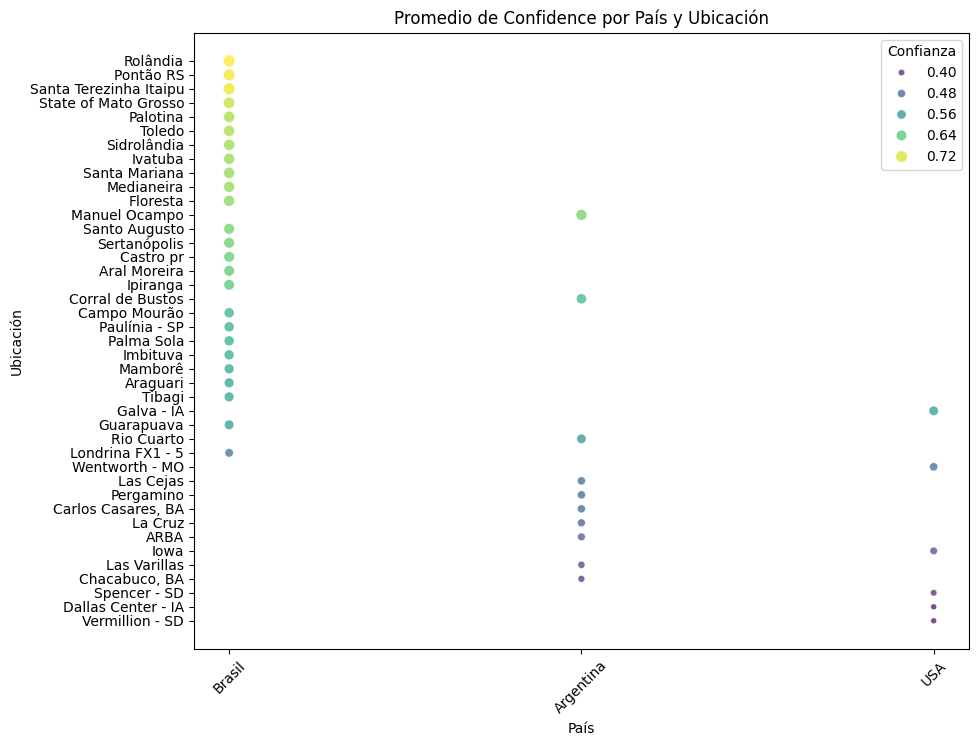

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='country', y='location', size='confidence', data=average_confidence_sorted, hue='confidence', palette='viridis', alpha=0.7)

plt.xlabel('País')
plt.ylabel('Ubicación')
plt.title('Promedio de Confidence por País y Ubicación')
plt.xticks(rotation=45)
plt.legend(title='Confianza')

plt.show()

In [20]:
excel_file_path = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/TrainingAzu/Layout Tags.xlsx'

df_layout_tags = pd.read_excel(excel_file_path)

merged_df = pd.merge(df_combined, df_layout_tags, on='layout_id', how='inner')

print(merged_df)

      layout_id  confidence              field_name      location  country_x  \
0         31255    0.304125                  Cañete          ARBA  Argentina   
1         31255    0.360821                  Cañete          ARBA  Argentina   
2         31255    0.472195                  Cañete          ARBA  Argentina   
3         31255    0.472837                  Cañete          ARBA  Argentina   
4         31255    0.487631                  Cañete          ARBA  Argentina   
...         ...         ...                     ...           ...        ...   
9961       7307    0.687232  Sertanópolis - Parte I  Sertanópolis     Brasil   
9962       7307    0.694153  Sertanópolis - Parte I  Sertanópolis     Brasil   
9963       7307    0.710553  Sertanópolis - Parte I  Sertanópolis     Brasil   
9964       7307    0.710780  Sertanópolis - Parte I  Sertanópolis     Brasil   
9965       7307    0.733518  Sertanópolis - Parte I  Sertanópolis     Brasil   

      latitude  longitude         fligh

In [21]:
print(merged_df['relevant (new) tags'])

0       4,6,11
1       4,6,11
2       4,6,11
3       4,6,11
4       4,6,11
         ...  
9961     2,4,5
9962     2,4,5
9963     2,4,5
9964     2,4,5
9965     2,4,5
Name: relevant (new) tags, Length: 9966, dtype: object


In [22]:
df = merged_df
def extract_tags_and_confidence(row):
    confidence = row['confidence']
    tags = str(row['relevant (new) tags'])
    tag_list = []
    for tag in tags.split(','):
        try:
            tag_int = int(tag.strip())
            tag_list.append(tag_int)
        except ValueError:
            pass

    return [(tag, confidence) for tag in tag_list]

tag_confidence_list = df.apply(extract_tags_and_confidence, axis=1).explode()

result_df = pd.DataFrame(tag_confidence_list.tolist(), columns=['tag', 'mean_confidence'])

mean_confidence_by_tag = result_df.groupby('tag')['mean_confidence'].mean()

print(mean_confidence_by_tag)

tag
1     0.447469
2     0.587854
3     0.476177
4     0.511454
5     0.519448
6     0.525082
7     0.560646
8     0.587826
9     0.529275
10    0.454132
11    0.497023
Name: mean_confidence, dtype: float64


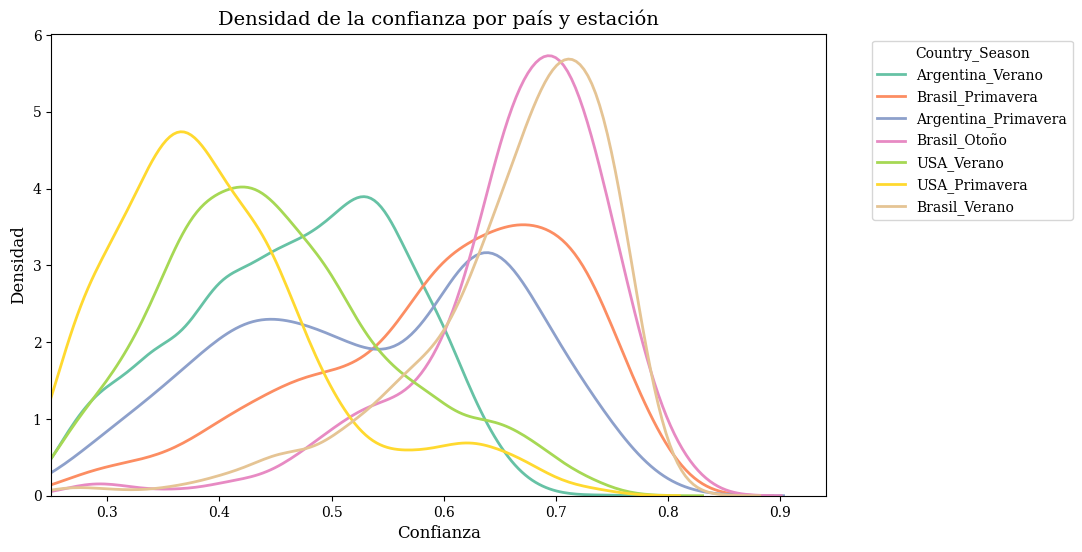

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['font.family'] = 'DejaVu Serif'

df = df_combined
categories = df['country_season'].unique()
colors = sns.color_palette('Set2', len(categories))

plt.figure(figsize=(10, 6))
for i, category in enumerate(categories):
    subset = df[df['country_season'] == category]
    sns.kdeplot(subset['confidence'], color=colors[i], label=category, linewidth=2)

plt.legend(title='Country_Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0.25, None)
plt.title('Densidad de la confianza por país y estación', fontsize=14)
plt.xlabel('Confianza', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.show()

# Bounding Boxes alejadas de la linea central

<ipython-input-25-04ae668743a7>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_min = int(min(X))
<ipython-input-25-04ae668743a7>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_max = int(max(X))


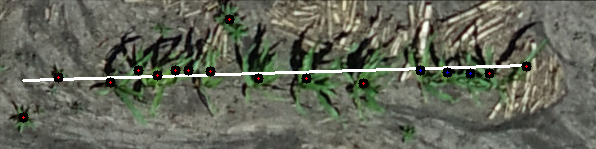

<ipython-input-25-04ae668743a7>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_min = int(min(X))
<ipython-input-25-04ae668743a7>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_max = int(max(X))


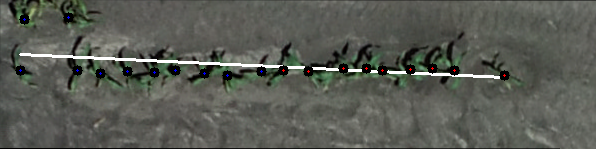

<ipython-input-25-04ae668743a7>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_min = int(min(X))
<ipython-input-25-04ae668743a7>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_max = int(max(X))


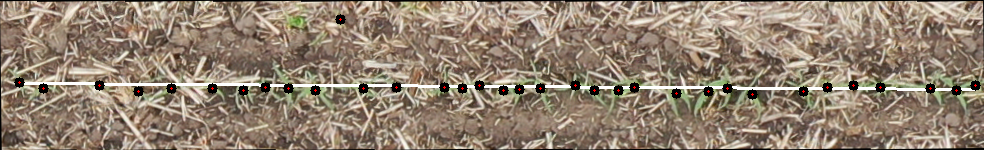

In [25]:
import os
import cv2
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab.patches import cv2_imshow

img_folder = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/Test/images'
label_folder = '/content/drive/MyDrive/ITBA - Analitica y +/5.1 Proyecto Final 82.02/Carpeta IMP/TrainingVacasVaqueras/MODELOfinal/TESTEO2/labels'

image_files = os.listdir(img_folder)

for img_file in image_files:
    if img_file.endswith('.png'):
        img_path = os.path.join(img_folder, img_file)
        img = cv2.imread(img_path)

        label_file = img_file.replace('.png', '.txt')
        label_path = os.path.join(label_folder, label_file)

        if not os.path.exists(label_path):
            print(f"Advertencia: No se encontró el archivo de etiquetas para {img_file}. Saltando esta imagen.")
            continue

        boxes = []
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])
                confidence = float(parts[5])

                img_h, img_w, _ = img.shape
                center_x = int(x_center * img_w)
                center_y = int(y_center * img_h)

                boxes.append((center_x, center_y, width, height))

        if len(boxes) > 1:
            X = np.array(boxes)[:, 0].reshape(-1, 1)
            y = np.array(boxes)[:, 1]

            model = LinearRegression().fit(X, y)
            line_slope = model.coef_[0]
            line_intercept = model.intercept_

            distances = np.abs(y - (line_slope * X + line_intercept))

            threshold_distance = 50  # Ajusta este valor según sea necesario

            outlier_indices = np.where(distances > threshold_distance)[0]

            if len(outlier_indices) > 0:
                x_min = int(min(X))
                x_max = int(max(X))
                y_min = int(line_slope * x_min + line_intercept)
                y_max = int(line_slope * x_max + line_intercept)
                cv2.line(img, (x_min, y_min), (x_max, y_max), (255, 255, 255), 2)  # White color

                for i, (center_x, center_y, width, height) in enumerate(boxes):
                    if i in outlier_indices:
                        color = (0, 0, 255)
                    else:
                        color = (255, 0, 0)

                    cv2.circle(img, (center_x, center_y), 5, (0, 0, 0), -1)  # Black color

                    cv2.rectangle(img, (center_x - int(width / 2), center_y - int(height / 2)),
                                  (center_x + int(width / 2), center_y + int(height / 2)), color, 2)

                cv2_imshow(img)
